In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import os
import matplotlib.pyplot as plt


train_dir = "D:/Major Project/normalized/train"  
valid_dir = "D:/Major Project/normalized/valid"  

# Image size and batch size settings
IMG_SIZE = (224, 224)  # Resize all images to 224x224 pixels
BATCH_SIZE = 32  # Number of images per batch

#  Data Augmentation for Training Set
# Enhances the dataset with transformations to improve model generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values (0-255 → 0-1)
    rotation_range=40,      # Random rotation up to 40 degrees
    width_shift_range=0.3,  # Random horizontal shift
    height_shift_range=0.3, # Random vertical shift
    shear_range=0.3,        # Shearing transformation
    zoom_range=0.3,         # Random zoom
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill pixels after transformation
)

#  Only Rescale Validation Set (No Augmentation)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory and apply preprocessing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,    # Resize all images to 224x224
    batch_size=BATCH_SIZE,   # Number of images per batch
    class_mode='categorical', # Multi-class classification (Softmax output)
    shuffle=True             # Shuffle images for better generalization
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Do not shuffle validation data for consistency
)

#  Define the Improved CNN Model
model = Sequential([
    # First Convolutional layer
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),  # Extracts low-level features
    BatchNormalization(),  # Normalizes activations for stable learning
    MaxPooling2D(2,2),  # Reduces feature map size

    # Second Convolutional layer
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Third Convolutional layer
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # Flatten layer to convert feature maps into 1D vector
    Flatten(),
    
    # Fully Connected Dense Layer
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),  # Reduces overfitting with L2 regularization
    Dropout(0.5),  # Drops 50% of neurons randomly to prevent overfitting
    
    # Output Layer for Multi-Class Classification
    Dense(4, activation='softmax')  # Softmax activation for 4-class classification
])

# Compile the Model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss='categorical_crossentropy',  # Multi-class classification loss function
              metrics=['accuracy'])  # Track accuracy during training

# Early Stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Verify image batches before training
batch_x, batch_y = next(train_generator)
print(f"Batch Shape (Images): {batch_x.shape}")  # Expected: (BATCH_SIZE, 224, 224, 3)
print(f"Batch Shape (Labels): {batch_y.shape}")  # Expected: (BATCH_SIZE, 4)

# Train the Model with Improved Parameters
EPOCHS = 25  
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    callbacks=[early_stop]  # Stops training early if validation loss increases
)

#  Save the trained model
model.save("models/custom_cnn_teeth_health_v2.h5")

#  Model Summary
model.summary()


Found 16000 images belonging to 4 classes.
Found 4121 images belonging to 4 classes.


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Batch Shape (Images): (32, 224, 224, 3)
Batch Shape (Labels): (32, 4)
Epoch 1/25


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 747s 1s/step - accuracy: 0.3109 - loss: 2.4083 - val_accuracy: 0.3125 - val_loss: 1.9011
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 583s 1s/step - accuracy: 0.3649 - loss: 1.8061 - val_accuracy: 0.4329 - val_loss: 1.9499
Epoch 3/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 583s 1s/step - accuracy: 0.3881 - loss: 1.7608 - val_accuracy: 0.4494 - val_loss: 2.2036
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 587s 1s/step - accuracy: 0.4062 - loss: 1.7206 - val_accuracy: 0.4285 - val_loss: 1.8061
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 585s 1s/step - accuracy: 0.4104 - loss: 1.6923 - val_accuracy: 0.4043 - val_loss: 1.7918
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 581s 1s/step - accuracy: 0.4139 - loss: 1.6478 - val_accuracy: 0.3776 - val_loss: 1.6991
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 582s 1s/step - accuracy: 0.4263 - loss: 1.5932 - val_accuracy: 0.4283 - val_loss: 1.7187
Epoch 8/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 583s 1s/step - accuracy: 0.4192 - loss: 1.5638 - val_accuracy: 0.431

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,738,894 (254.59 MB)

 Trainable params: 22,246,148 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 44,492,298 (169.72 MB)

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model
model = load_model("models/custom_cnn_teeth_health_v4.h5")

# Define data generator (same preprocessing as training)
train_datagen = ImageDataGenerator(rescale=1./255)

# Load training dataset
train_generator = train_datagen.flow_from_directory(
    "D:/Major Project/normalized/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No need to shuffle when evaluating
)

# Evaluate model on training data
train_loss, train_accuracy = model.evaluate(train_generator)

print(f"Estimated Final Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")


Found 13123 images belonging to 4 classes.
411/411 ━━━━━━━━━━━━━━━━━━━━ 184s 438ms/step - accuracy: 0.7814 - loss: 1.1736
Estimated Final Training Accuracy: 66.43%
Training Loss: 1.2216


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model
model = load_model("models/custom_cnn_teeth_health_v2.h5")

# Normalize test images (same as training preprocessing)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data
test_generator = test_datagen.flow_from_directory(
    "D:/Major Project/normalized/test",
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',
    shuffle=False  #  Don't shuffle for evaluation
)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Final Test Loss: {test_loss:.4f}")


Found 3146 images belonging to 4 classes.


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 28s 275ms/step - accuracy: 0.4416 - loss: 1.4737
Final Test Accuracy: 44.12%
Final Test Loss: 1.4317


Found 3146 images belonging to 4 classes.


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step


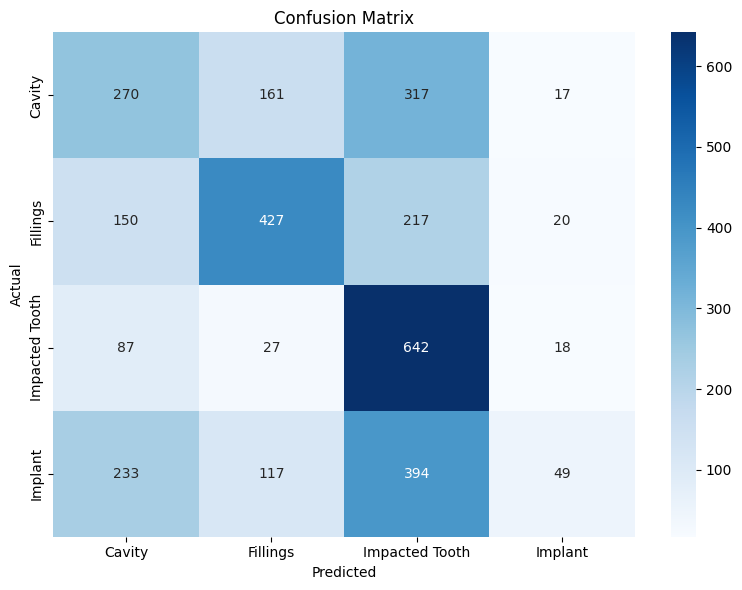

Classification Report:

                precision    recall  f1-score   support

        Cavity       0.36      0.35      0.36       765
      Fillings       0.58      0.52      0.55       814
Impacted Tooth       0.41      0.83      0.55       774
       Implant       0.47      0.06      0.11       793

      accuracy                           0.44      3146
     macro avg       0.46      0.44      0.39      3146
  weighted avg       0.46      0.44      0.39      3146



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load trained model
model = load_model("models/custom_cnn_teeth_health_v2.h5")

# Test data path
test_dir = "D:/Major Project/normalized/test"

# Image preprocessing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Classification Report 
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n")
print(report)
